In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regressão Linear/Regressão Skit Learn/Multipla/C├│pia de CarPrice_Assignment.csv')

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [93]:
df.shape

(205, 26)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

In [48]:
df['enginetype'].head()

0    0
1    0
2    5
3    3
4    3
Name: enginetype, dtype: int64

In [42]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [46]:
le.fit(df.CarName)
df.CarName = le.transform(df.CarName)

le.fit(df.fueltype)
df.fueltype = le.transform(df.fueltype)

le.fit(df.aspiration)
df.aspiration = le.transform(df.aspiration)

le.fit(df.doornumber)
df.doornumber = le.transform(df.doornumber)

le.fit(df.carbody)
df.carbody = le.transform(df.carbody)

le.fit(df.drivewheel)
df.drivewheel = le.transform(df.drivewheel)

le.fit(df.enginelocation)
df.enginelocation = le.transform(df.enginelocation)

le.fit(df.fuelsystem)
df.fuelsystem = le.transform(df.fuelsystem)

le.fit(df.cylindernumber)
df.cylindernumber = le.transform(df.cylindernumber)

le.fit(df.enginetype)
df.enginetype = le.transform(df.enginetype)

<Axes: xlabel='price', ylabel='Count'>

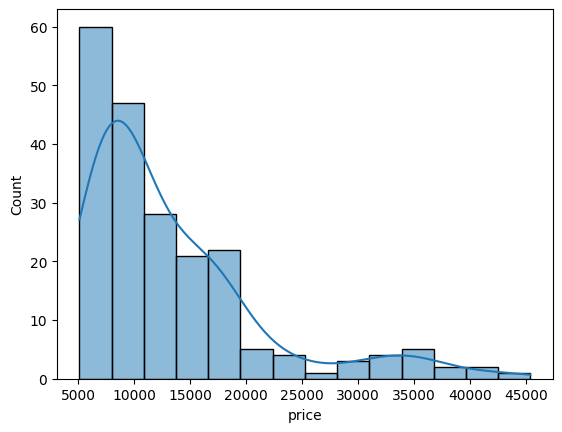

In [79]:
sns.histplot(x='price', data= df, kde=True)

<Axes: xlabel='horsepower', ylabel='Count'>

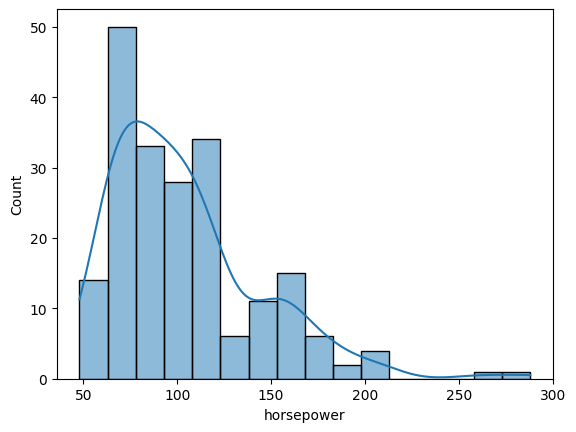

In [80]:
sns.histplot(x='horsepower', data= df, kde=True)

<Axes: xlabel='peakrpm', ylabel='Count'>

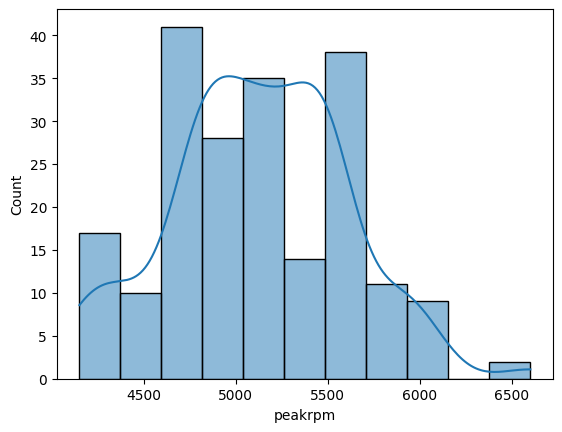

In [94]:
sns.histplot(x='peakrpm', data= df, kde=True)

Normalização

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [49]:
df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [50]:
df_norm.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.004902,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.009804,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,...,0.343396,0.714286,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.014706,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,...,0.181132,0.714286,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.019608,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,...,0.283019,0.714286,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


Ajustando o p _value com o StatsMOdel

In [58]:
import statsmodels.formula.api as smf

In [52]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [60]:
function='price~car_ID+symboling+symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'

model = smf.ols(formula=function, data=df_norm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     64.23
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           5.48e-76
Time:                        17:40:44   Log-Likelihood:                 276.99
No. Observations:                 205   AIC:                            -502.0
Df Residuals:                     179   BIC:                            -415.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0762      0.192  

In [87]:
function='price~CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm -1'

model = smf.ols(formula=function, data=df_norm).fit()

print(model.summary())

# R2 bem alto depois de todos os tratamentos feitos

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              272.1
Date:                Wed, 17 Jan 2024   Prob (F-statistic):                   5.21e-116
Time:                        17:51:23   Log-Likelihood:                          271.87
No. Observations:                 205   AIC:                                     -517.7
Df Residuals:                     192   BIC:                                     -474.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [82]:
x = df_norm[['CarName','doornumber','carbody','drivewheel','enginelocation','carwidth','carheight','curbweight','enginesize','stroke','compressionratio','horsepower','peakrpm']]
y= df_norm[['price']]

In [84]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
lr= LinearRegression()
lr.fit(x,y)

LinearRegression()

In [86]:
r_sq = lr.score(x,y)

print(r_sq)
# r2 muito bom

0.8957104217461449


In [89]:
y_pred_train = lr.predict(x_train)

print('MEA:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MEA: 0.04760097445950692
MSE: 0.0036269034049875182
RMSE: 0.06022377773759728


In [91]:
y_pred_teste = lr.predict(x_test)

print('MEA:', metrics.mean_absolute_error(y_test, y_pred_teste))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_teste))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_teste)))

MEA: 0.04885199554631912
MSE: 0.005901961267238038
RMSE: 0.07682422318017956
